# The goal of this lab is to help you to
* get an understanding of frequency analysis in image data by using the Fourier transform,
expressed spatially or in the Fourier domain,
* become familiar with the two-dimensional Fourier transform, by studying and testing its
properties in practice,
* learn the relation between the continuous and discrete Fourier transform, and design a smoothing filter for Gaussian convolution,
* understand the effect of different smoothing operations on various kinds of noise,
* understand the effect of smoothing on different image resolutions generated by subsampling,
* get practical experience of differences between synthetic and real data

The purpose of exercise 1 is for you to become familiar with the characteristics of the Fourier transform. The purpose of exercise 2 is for you to design a Gaussian smoothing filter using the Fourier
transform and to understand the relation between continuous and discrete cases. The purpose of
exercise 3 is to study different smoothing filters and their effects on noise and subsampling.


Remaining exercises are more problem-oriented and experimental in nature and formulations are
thus more concise. If you happen to have difficulties with Python or the environment in general
contact the lab assistants during the scheduled lab hours.
Reporting: For you to efficiently report your labs, you need to create a script file that reproduces the
experimental results. You should also summarize results and conclusions from your experiments,
writing down answers to explicitly stated questions in the answer sheet. For many exercises it is
recommended that you create illustrations with multiple images simultaneously shown on screen.


As prerequisites to this lab exercise, you should have studied the course material regarding spatial
filtering and image restoration. To get started with the lab you need to set the path, in order to
access the image samples and functions of the course library.


#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave


## 1. Fourier transform

In [2]:
Fhat = np.zeros((128,128), dtype=np.complex128)
Fhat[5, 9] = 1 #high frequency
#Fhat[0, 0] = 1 #low frequency

c:\Users\andre\Documents\ProjectFolder\ComputerVision\DD2423_Python_Labs\Functions.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  im = res*(Image.astype(np.float32) - zmin)/float(range)
c:\Users\andre\Documents\ProjectFolder\ComputerVision\DD2423_Python_Labs\Functions.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(im, dtype=np.uint8), cmap)


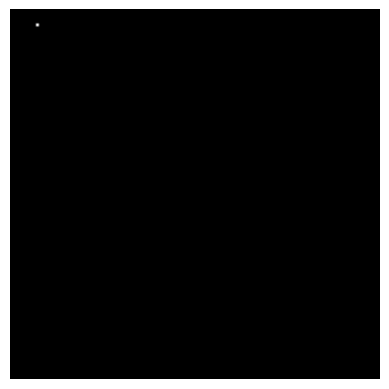

In [3]:
showgrey(Fhat)

Text(0.5, 1.0, 'Phase')

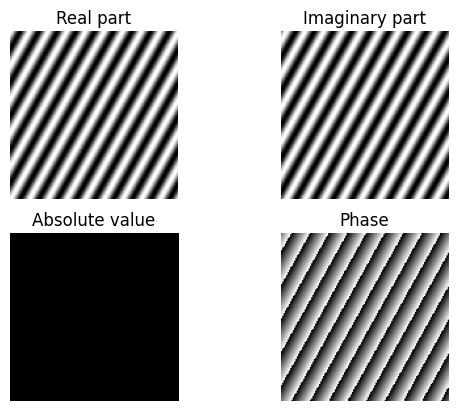

In [4]:
F = ifft2(Fhat)
Fabsmax = np.max(np.abs(F))

# 4 subplots in 2 rows and 2 columns showgrey
plt.subplot(2,2,1)
showgrey(np.real(F), False, 64, -Fabsmax, Fabsmax)
plt.title('Real part')

plt.subplot(2,2,2)
showgrey(np.imag(F), False, 64, -Fabsmax, Fabsmax)
plt.title('Imaginary part')

plt.subplot(2,2,3)
showgrey(np.abs(F), False, 64, -Fabsmax, Fabsmax)
plt.title('Absolute value')

plt.subplot(2,2,4)
showgrey(np.angle(F), False, 64, -np.pi, np.pi)
plt.title('Phase')


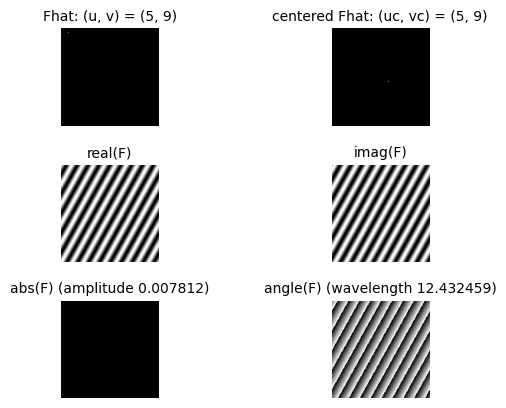

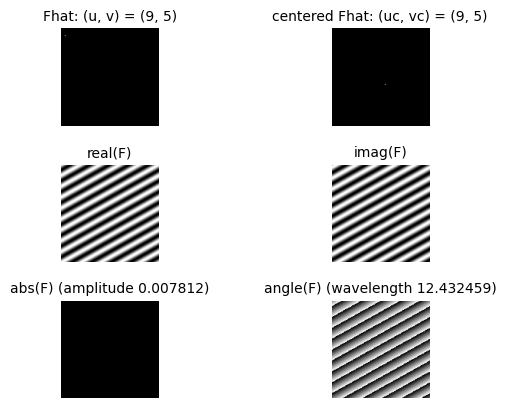

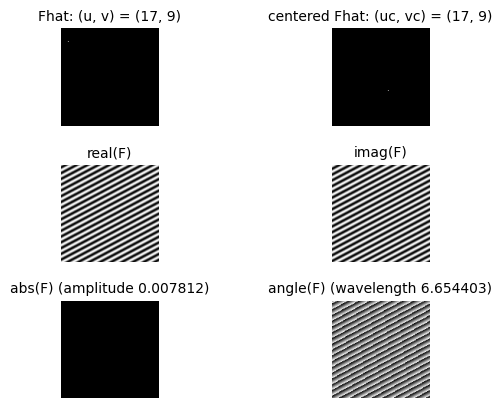

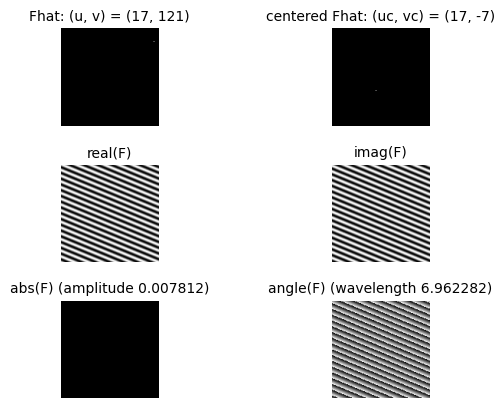

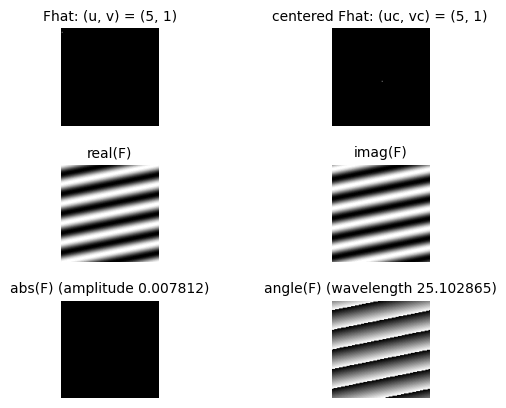

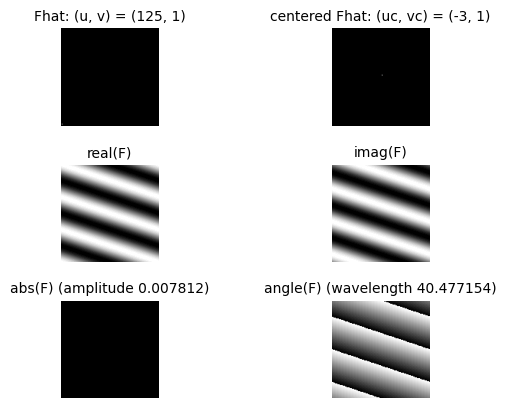

In [5]:
for (p,q) in [(5,9), (9,5), (17,9), (17,121), (5,1), (125,1)]:
    fftwave(p,q,128)

Question 1: Repeat this exercise with the coordinates p and q set to (5, 9), (9, 5), (17, 9),(17, 121), (5, 1) and (125, 1) respectively. What do you observe?

* Lower frequencies on the edges (e.g. zero-frequency top-left corner)
* Higher frequencies near the center (e.g highest frequency on the center)
* The position of the white dot determines the waves direction
* Moving along axis u (Vertical axis) yields horizontal waves (e.g. (63,0), (125,1), (5,1))
* Moving along axis v (Horizontal axis) yields vertical waves (e.g. 0,63)
* Moving along both axes determines diagonal waves
* The amplitude doesn't vary (same amplitude)
* Real and Imagine parts are shifted with a phase of $\frac{\pi}{2}$
* The waves have the same direction of the line from the origin (0,0) to (p,q), and the more the distance from the origin the higher the frequency
* The wavelength depends on the frequency (The higher the frequency the lower the wavelength)


Question 2: Explain how a position (p, q) in the Fourier domain will be projected as a sine wave in the spatial domain. Illustrate with a Matlab figure.


C:\Users\andre\AppData\Local\Temp\ipykernel_18732\2137804488.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


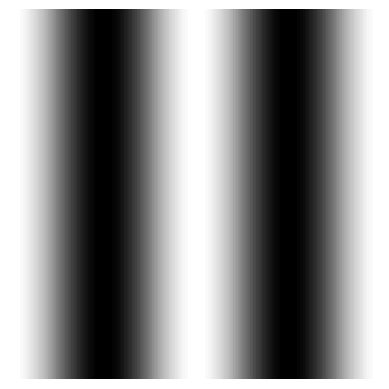

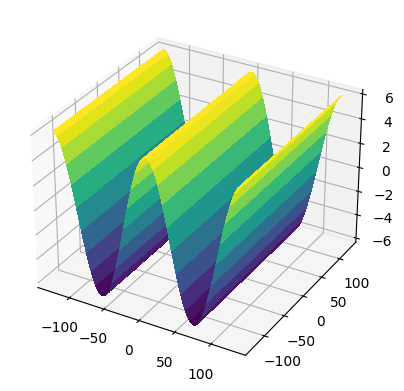

In [52]:
from colorspacious import cspace_converter
import matplotlib as mpl
sz = 128
u,v = 0,2
Fhat = np.zeros([sz, sz])
Fhat[u, v] = 1

F = np.fft.ifft2(Fhat)
Fabsmax = np.max(np.abs(F))



x = np.linspace(-sz,sz, sz)
y = np.linspace(-sz,sz, sz)
X, Y = np.meshgrid(x, y)


showgrey(F, False, 64, -Fabsmax, Fabsmax)
# plot 3d surface 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, F, cmap= mpl.colormaps['viridis'], linewidth=0, antialiased=False)

Question 3: How large is the amplitude? Write down the expression derived from Equation (4) in
these notes. Complement the code (variable amplitude) accordingly

From (4), $F(m,n)= \frac{1}{\sqrt{MN}} \sum_{m:0}^M \sum_{n:0}^N [\hat{F}(u,v) e^\frac{2 \pi i n v}{N}] e^\frac{2 \pi i m u}{M}$ and from euler's equation $e^{iwx}=cos(wx)+i sin(wx)$ 

=> $F(m,n)= \frac{1}{\sqrt{MN}} \sum_{m:0}^M \sum_{n:0}^N \hat{F}(u,v) cos(\frac{2 \pi i n v}{N} + \frac{2 \pi i m u}{M})+isin(\frac{2 \pi i n v}{N} +\frac{2 \pi i m u}{M})$

Spectrum of Fourier transform = $|F(u,v)| = \sqrt{Re(F)^2+Im(F)^2}$ and amplitude = $max|F(u,v)| = \frac{1}{\sqrt{MN}} max[\sum_{m:0}^M \sum_{n:0}^N \hat{F}(u,v)]$

M,N = sz, sz => $amplitude = \frac{\hat{F}_{max}}{sz} $

Question 4: How does the direction and length of the sine wave depend on p and q? Write down the
explicit expression that can be found in the lecture notes. Complement the code (variable wavelength)
accordingly.


$\lambda = \frac{2 \pi}{||w||} = \frac{2 \pi}{\sqrt{w_1^2+w_2^2} } $ ; $w_D = \frac{2 \pi u}{N} $ 

=> $\lambda = \frac{2 \pi}{\sqrt{(\frac{2 \pi u}{N})^2+(\frac{2 \pi v}{M})^2}} = \frac{sz}{\sqrt{uc^2+vc^2} } $

Question 5: What happens when we pass the point in the center and either p or q exceeds half the
image size? Explain and illustrate graphically with a figure!
* (p,q) becomes (uc,vc) after the re-centering
* if either p or q exceeds half the image size, the centered point will be computed as p-sz, q-sz respectively.

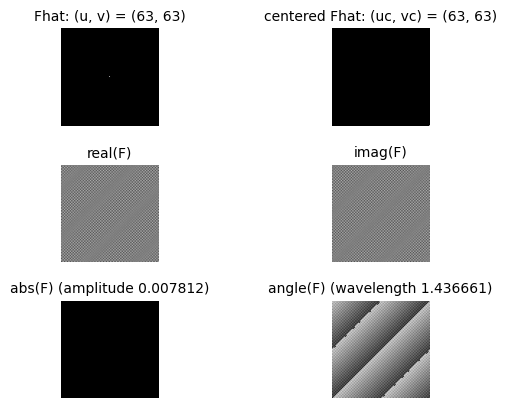

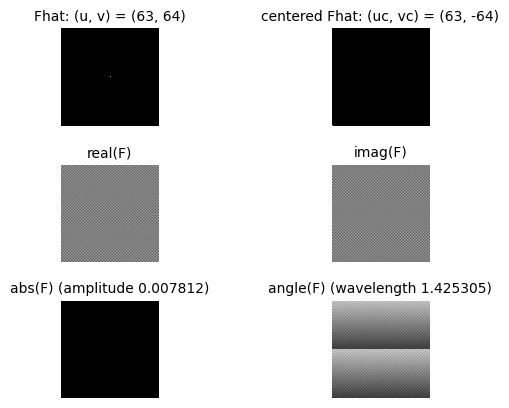

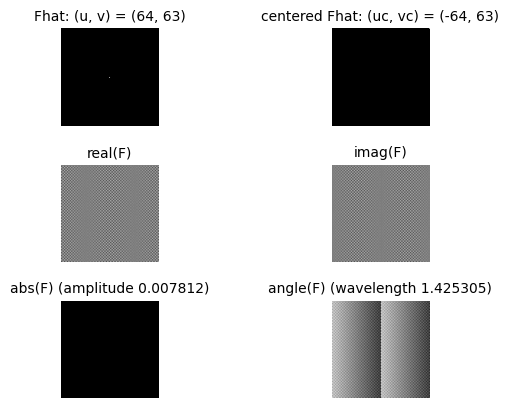

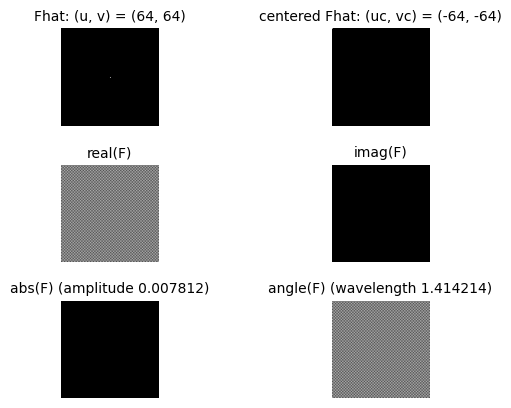

(None, None, None, None)

In [7]:
fftwave(63,63,128), fftwave(63,64,128),fftwave(64,63,128),fftwave(64,64,128)

Question 6: What is the purpose of the instructions following the question: What is done by
these instructions? in the code?

The purpose of those instructions is to perferm the re-centering operation. This consists in a change of variables (u,v) into (uc,vc). The new domain for uc and vc is $[\frac{-N}{2}, \dots, \frac{N}{2}-1]$

## Linearity

In [8]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

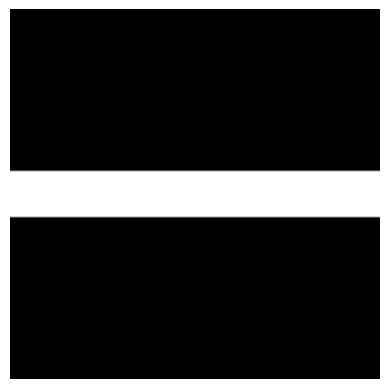

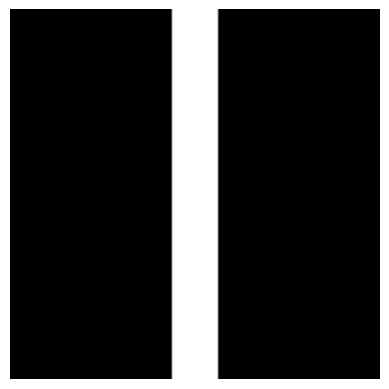

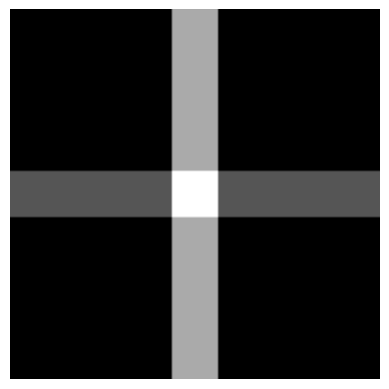

In [9]:
showgrey(F)
showgrey(G)
showgrey(H)

In [10]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

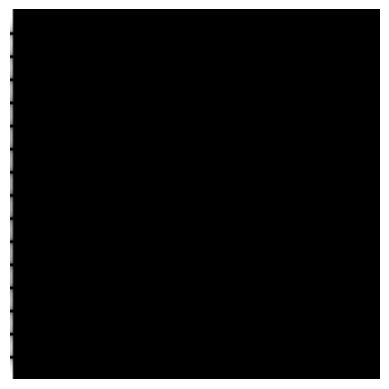

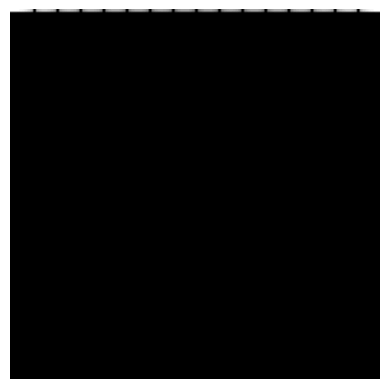

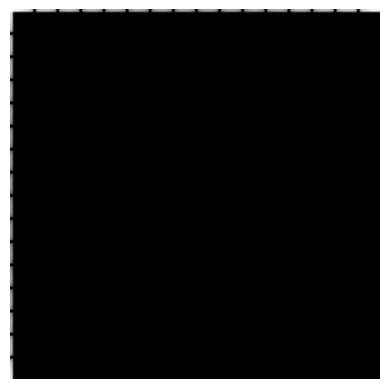

In [11]:
showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

* fftshift() is used to center the image.
* the log() is used "to enhance" the image

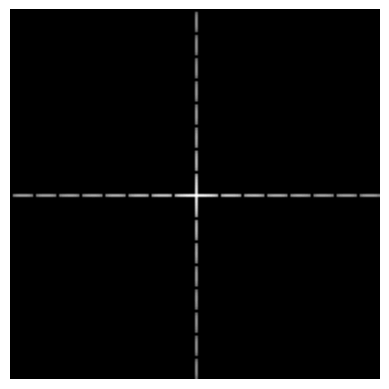

In [12]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))

Question 7: Why are these Fourier spectra concentrated to the borders of the images? Can you
give a mathematical interpretation? Hint: think of the frequencies in the source image and consider
the resulting image as a Fourier transform applied to a 2D function. It might be easier to analyze each
dimension separately!

$\hat{F}(u,v)=\frac{1}{\sqrt{M N}} \sum_{m:0}^{M-1}\sum_{n:0}^{N-1} f(m,n) e^{-2\pi i (\frac{m u}{M}+\frac{n u}{N})} $ 

we have for f: $f(m,n)=\left\{\begin{matrix}
1 & m_1\leq m\leq m_2 \\ 
0 & otherwise
\end{matrix}\right.$ , where m1=57 and m2=72

$\hat{F}(u,v)=\frac{1}{\sqrt{M N}} \sum_{m:m_1}^{m_2} e^{-2\pi i (\frac{m u}{M})} \sum_{n:0}^{N-1}e^{-2\pi i (\frac{n u}{N})} = \frac{1}{\sqrt{M N}} \sum_{m:m_1}^{m_2} e^{-2\pi i (\frac{m u}{M})} * \delta(n)$ ,

where $\delta(n)=\left\{\begin{matrix}
1 & n=0 \\ 0 & otherwise \end{matrix}\right.$ 

Since $\delta(n)=1$ only for n=0, we will have  Fourier spectra for F concentrated to the left border. And similarly, for G, will be concentrated on the upper border.

Question 8: Why is the logarithm function applied?
Answers:
By substituting each pixel value with its logarithm, we are enhancing low intensity pixel values (grey-level transformation).
1 is added to have non-negative values => log(1)=0 and $log(1 + |\hat{F}|)\geq 0$

Pixel having zero values will be always mapped with zero values since log(1+0)=0


Question 9: What conclusions can be drawn regarding linearity? From your observations can you
derive a mathematical expression in the general case?

H is a linear combination of F and G: $H=F+2G$, and also its Fourier spectra $\hat{H}=\hat{F}+2\hat{G}$. 

This can be derived by the following properties of the Fourier transform and its inverse: 

$\mathscr{F}[\alpha f(m,n) + \beta g(m,n)] = \alpha \hat{f}(u,v)+\beta \hat{g}(u,v)$

$\mathscr{F}^{-1}[\alpha \hat{f}(u,v)+\beta \hat{g}(u,v)] = \alpha f(m,n) + \beta g(m,n)$

## Multiplication

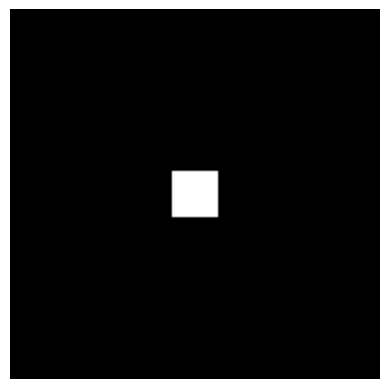

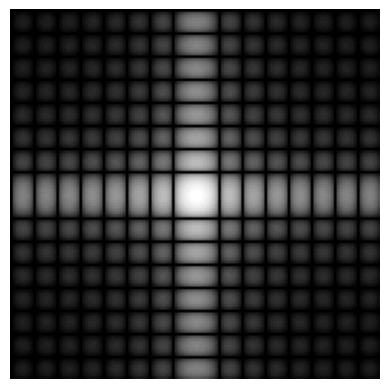

In [13]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

showgrey(F * G) #pointwise multiplication
showfs(fft2(F * G))

Question 10: Are there any other ways to compute the last image? Remember what
multiplication in Fourier domain equals to in the spatial domain! Perform these alternative
computations in practice.

A multiplication in the spatial domain is the same as a convolution in the Fourier domain, and vicevera.

$\mathscr{F}(f) \ast \mathscr{F}(g) = \mathscr{F}(f \cdot g)  $

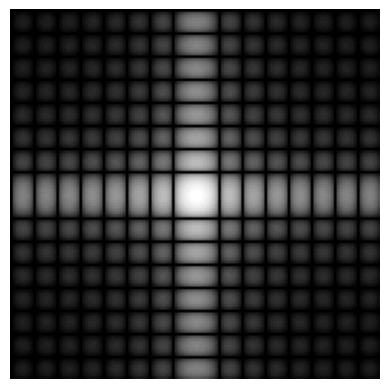

In [14]:
showfs((fft2(F) @ fft2(G))/(128**2)) #convolution in frequency domain + normalization

## Scaling

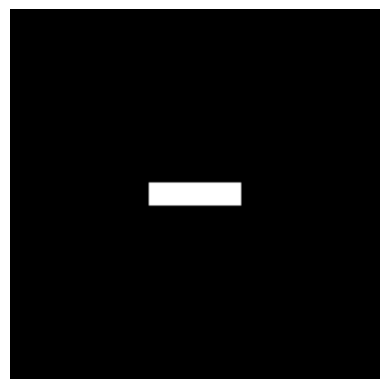

In [15]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)

showgrey(F)

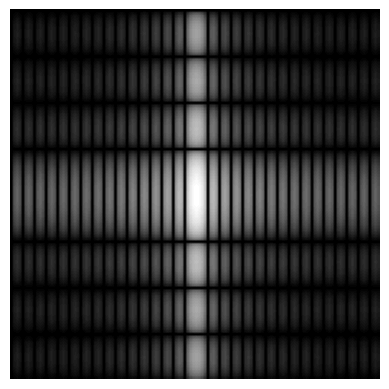

In [16]:
showfs(fft2(F))

Question 11: What conclusions can be drawn from comparing the results with those in the
previous exercise? See how the source images have changed and analyze the effects of
scaling

Compression (scale down) in the spatial domain is same as expansion (scale up) in Fourier domain, and viceversa.

$g(x,y) = f(ax, by)$

$\hat{g}(u,v)=\frac{1}{ab}\hat{f}(\frac{u}{a},\frac{v}{b}) $

First image has 16x16 white square, while second image 8x32. Basically, we are scaling down the height and up the width $(a = \frac{1}{2}, b = 2)$ 

In the fourier domain, the compression of the height in the spatial domain, corresponds to an expansion in the vertical direction, and the expansion of the width corresponds to an horizontal compression.



## Rotation

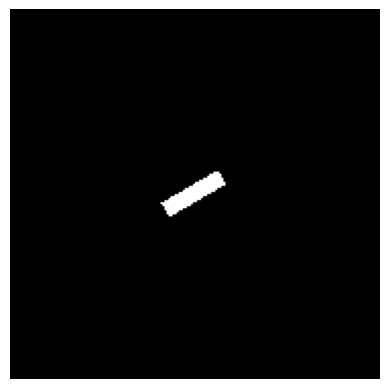

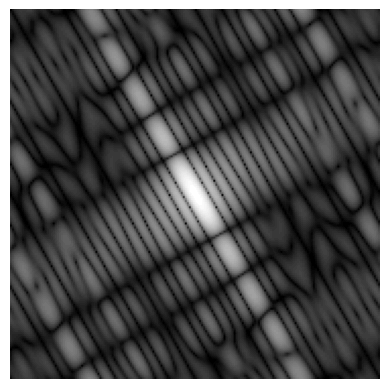

In [17]:
alpha = 30

G = rot(F, alpha )
showgrey(G)

Ghat = fft2(G)
showfs(Ghat)

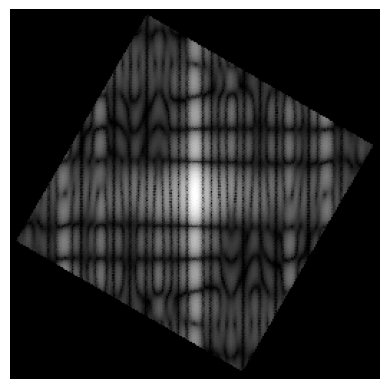

In [18]:
Hhat = rot(fftshift(Ghat), -alpha )
showgrey(np.log(1 + np.abs(Hhat)))


Text(0.5, 1.0, 'Hhat - 45 degrees')

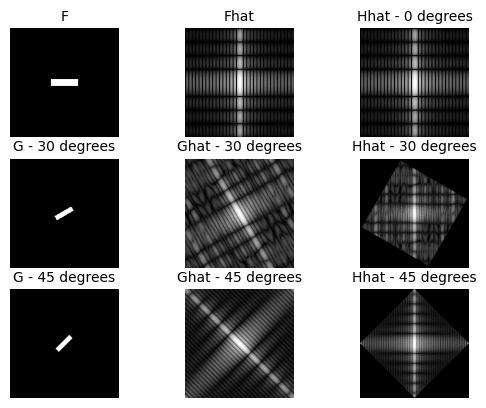

In [19]:
alpha = [30,45]
G_30 = rot(F, alpha[0] )
Ghat_30 = fft2(G_30)
Hhat_30 = rot(fftshift(Ghat_30), -alpha[0] )

G_45 = rot(F, alpha[1] )
Ghat_45 = fft2(G_45)
Hhat_45 = rot(fftshift(Ghat_45), -alpha[1] )

plt.subplot(3,3,1)
showgrey(F, False)
plt.title('F')

plt.subplot(3,3,2)
showfs(fft2(F), False)
plt.title('Fhat')

plt.subplot(3,3,3)
showgrey(np.log(1 + np.abs(fftshift(fft2(F)))), False)
plt.title('Hhat - 0 degrees')

plt.subplot(3,3,4)
showgrey(G_30, False)
plt.title('G - 30 degrees')

plt.subplot(3,3,5)
showfs(Ghat_30, False)
plt.title('Ghat - 30 degrees')

plt.subplot(3,3,7)
showgrey(G_45, False)
plt.title('G - 45 degrees')

plt.subplot(3,3,8)
showfs(Ghat_45, False)
plt.title('Ghat - 45 degrees')

plt.subplot(3,3,6)
showgrey(np.log(1 + np.abs(Hhat_30)), False)
plt.title('Hhat - 30 degrees')

plt.subplot(3,3,9)
showgrey(np.log(1 + np.abs(Hhat_45)), False)
plt.title('Hhat - 45 degrees')


Question 12: What can be said about possible similarities and differences? Hint: think of the
frequencies and how they are affected by the rotation.

Rotation of the original image determines a rotation by the same angle in the fourier domain.
Magnitude and phase don't change.

Both in the spatial and fourier domain the rotation determines some distorsions, introducing noise (especially for 30 degrees).


## Information in Fourier phase and magnitude

In [20]:
img1 = np.load("Images-npy/phonecalc128.npy")
img2 = np.load("Images-npy/few128.npy")
img3 = np.load("Images-npy/nallo128.npy")


Text(0.5, 1.0, 'randphaseimage Nallo')

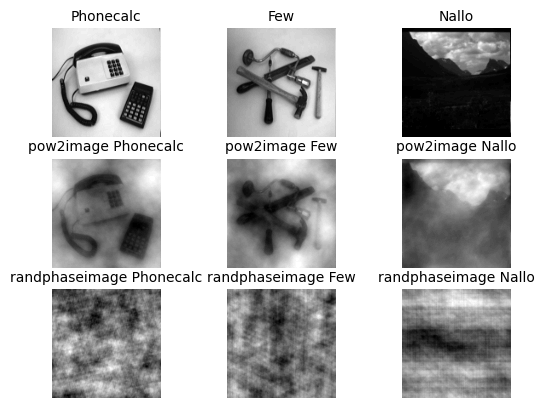

In [21]:
# 3 subplots in 1 row and 3 columns showgrey
plt.subplot(3,3,1)
showgrey(img1, False)
plt.title('Phonecalc')

plt.subplot(3,3,2)
showgrey(img2, False)
plt.title('Few')

plt.subplot(3,3,3)
showgrey(img3, False)
plt.title('Nallo')

# 3 subplots in 1 row and 3 columns pow2image showgrey
plt.subplot(3,3,4)
showgrey(pow2image(img1), False)
plt.title('pow2image Phonecalc')

plt.subplot(3,3,5)
showgrey(pow2image(img2), False)
plt.title('pow2image Few')

plt.subplot(3,3,6)
showgrey(pow2image(img3), False)
plt.title('pow2image Nallo')

# 3 subplots in 1 row and 3 columns randphaseimage showgrey
plt.subplot(3,3,7)
showgrey(randphaseimage(img1), False)
plt.title('randphaseimage Phonecalc')

plt.subplot(3,3,8)
showgrey(randphaseimage(img2), False)
plt.title('randphaseimage Few')

plt.subplot(3,3,9)
showgrey(randphaseimage(img3), False)
plt.title('randphaseimage Nallo')

Question 13: What information is contained in the phase and in the magnitude of the Fourier
transform?

The function pow2image() replace the original power spectrum and we can observe that this affect the magnitude (because of non linear transformation) but not the phase.

The function randphaseimage() keeps the magnitude but not the phase, which is replaced with a random distribution.

What we can conclude is that, the phase is far more important than the magnitude for images, in fact
* the phase determines the edges and contains most of the information,
* the magnitude determines the intensity of the image.

# 2. Gaussian convolution implemented via FFT

In [22]:
_t = [ 0.1, 0.3, 1.0, 10.0, 100.0]

Question 14: Show the impulse response and variance for the above mentioned t-values. What are
the variances of your discretized Gaussian kernel for t = 0.1, 0.3, 1.0, 10.0 and 100.0?

(128, 128) (128, 128) (128, 128)
With t =  0.1 , gaussfft has a variance of 
 [[2.50090796e-01 6.68960994e-14]
 [6.68960994e-14 2.50090796e-01]]
With t =  0.1 , discgaussfft has a variance of
  [[1.00000000e-01 9.90874049e-15]
 [9.90874049e-15 1.00000000e-01]]

(128, 128) (128, 128) (128, 128)
With t =  0.3 , gaussfft has a variance of 
 [[ 3.19150401e-01 -1.28039052e-13]
 [-1.28039052e-13  3.19150401e-01]]
With t =  0.3 , discgaussfft has a variance of
  [[ 3.00000000e-01 -8.54039062e-14]
 [-8.54039062e-14  3.00000000e-01]]

(128, 128) (128, 128) (128, 128)
With t =  1.0 , gaussfft has a variance of 
 [[1.00000021e+00 4.42135309e-14]
 [4.42135309e-14 1.00000021e+00]]
With t =  1.0 , discgaussfft has a variance of
  [[1.00000000e+00 1.80133686e-14]
 [1.80133686e-14 1.00000000e+00]]

(128, 128) (128, 128) (128, 128)
With t =  10.0 , gaussfft has a variance of 
 [[1.00000000e+01 7.95796644e-15]
 [7.95796644e-15 1.00000000e+01]]
With t =  10.0 , discgaussfft has a variance of
  [[1.000000

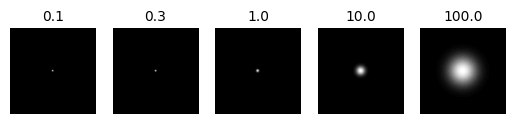

In [23]:
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.2)
plt.rc('axes', titlesize=10)

for i, t in enumerate(_t): 
	psf = gaussfft(deltafcn(128, 128), t) 
	discpsf = discgaussfft(deltafcn(128, 128), t)
	a1 = f.add_subplot(1, len(_t), i+1)
	showgrey(gaussfft(psf, t), False)
	a1.set_title(f'{t}')
	print("With t = ", t, ", gaussfft has a variance of \n", variance(psf))
	print("With t = ", t, ", discgaussfft has a variance of\n ", variance(discpsf))
	print("")

plt.show()

Question 15: Are the results different from or similar to the estimated variance? How does the
result correspond to the ideal continuous case? Lead: think of the relation between spatial and Fourier
domains for different values of t.

For higher t ($t\geq 1$) the results are closer to the estimated variance. For $t<1$ is difficult to model the distribution in the discrete case since we only have a fixed set of pixels. As a result, this discretization will introduce Fourier domain errors, which will get smaller as the variance grows.

Question 16: Convolve a couple of images with Gaussian functions of different variances (like t =
1.0, 4.0, 16.0, 64.0 and 256.0) and present your results. What effects can you observe?

The pictures become increasingly blurry as the variance rises. The higher the variance, the higher are the frequencies retained, i.e the more the noise. 

(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)


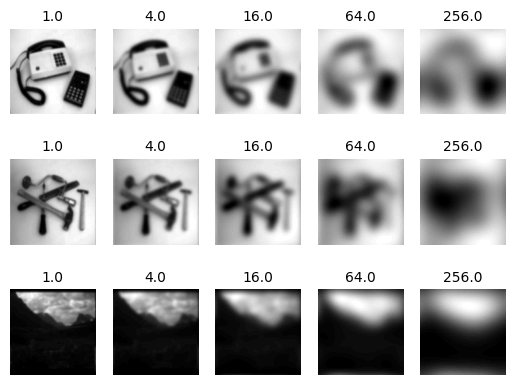

In [24]:
imgs = [img1, img2, img3]
_t1 = [1.0, 4.0, 16.0, 64.0, 256.0]



for i, img in enumerate(imgs):
	for j, t in enumerate(_t1):
		plt.subplot(3,5,5*i+j+1)	
		psf = discgaussfft(img, t)
		showgrey(psf, False)
		plt.title(f'{t}')


# 3. Smoothing

Text(0.5, 1.0, 'Salt and Pepper')

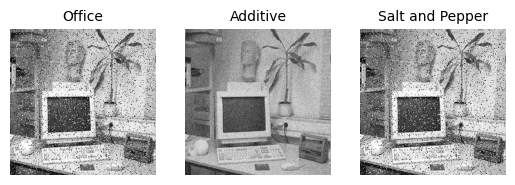

In [25]:
office = np.load("Images-npy/office256.npy")
add = gaussnoise(office, 16)
sap = sapnoise(office, 0.1, 255)

plt.subplot(1,3,1)
showgrey(office, False)
plt.title('Office')

plt.subplot(1,3,2)
showgrey(add, False)
plt.title('Additive')

plt.subplot(1,3,3)
showgrey(sap, False)
plt.title('Salt and Pepper')

Try to reduce the noise in the images add and sap with
* Gaussian smoothing (using function gaussfft() that you wrote in previous exercise, alternatively the function discgaussfft() available in the course library)
* Median filtering (using the function medfilt() in the course library)
* Ideal low-pass filtering (using the function ideal() in the course library)


(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


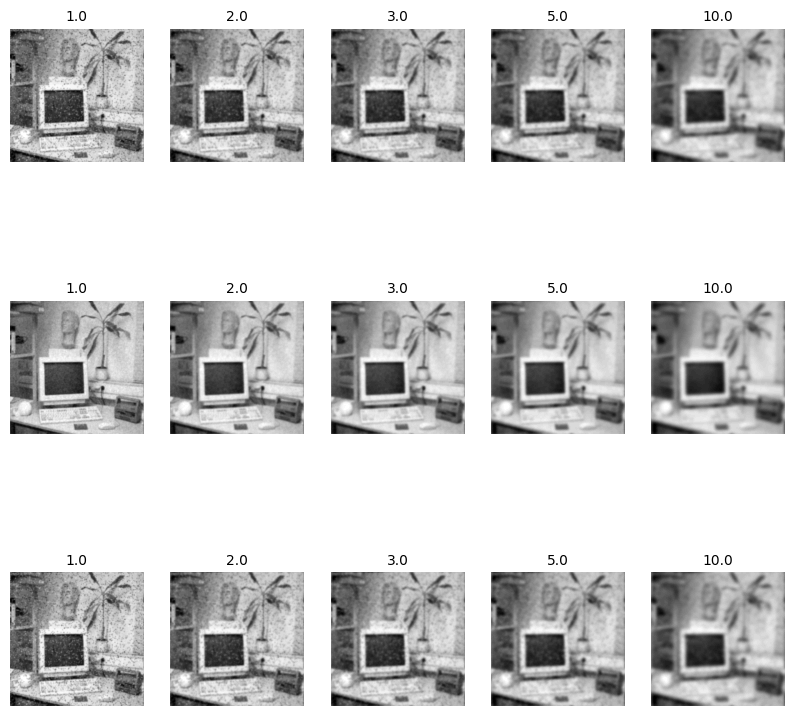

In [26]:
# Gaussian smoothing
_t1 = [1.0, 2.0, 3.0, 5.0, 10.0]
imgs = [office, add, sap]

plt.figure(figsize=(10,10))
for i, img in enumerate(imgs):
	for j, t in enumerate(_t1):
		plt.subplot(3,5,5*i+j+1)	
		psf = discgaussfft(img, t)
		showgrey(psf, False)
		plt.title(f'{t}')


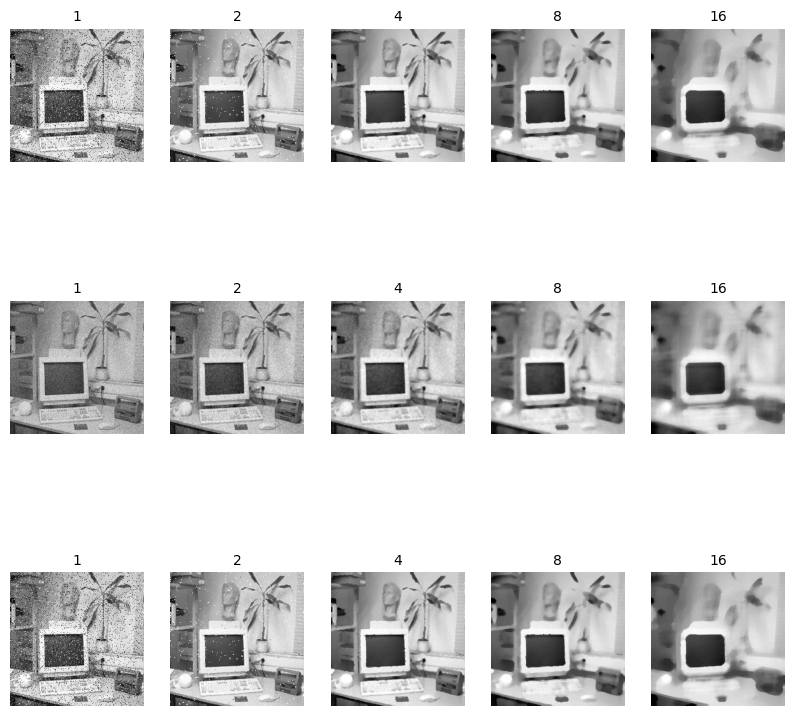

In [27]:
# Median filtering
w = [1, 2, 4, 8, 16]
imgs = [office, add, sap]

plt.figure(figsize=(10,10))
for i, img in enumerate(imgs):
    for j, t in enumerate(w):
        plt.subplot(3,5,5*i+j+1)	
        psf = medfilt(img, t)
        showgrey(psf, False)
        plt.title(f'{t}')

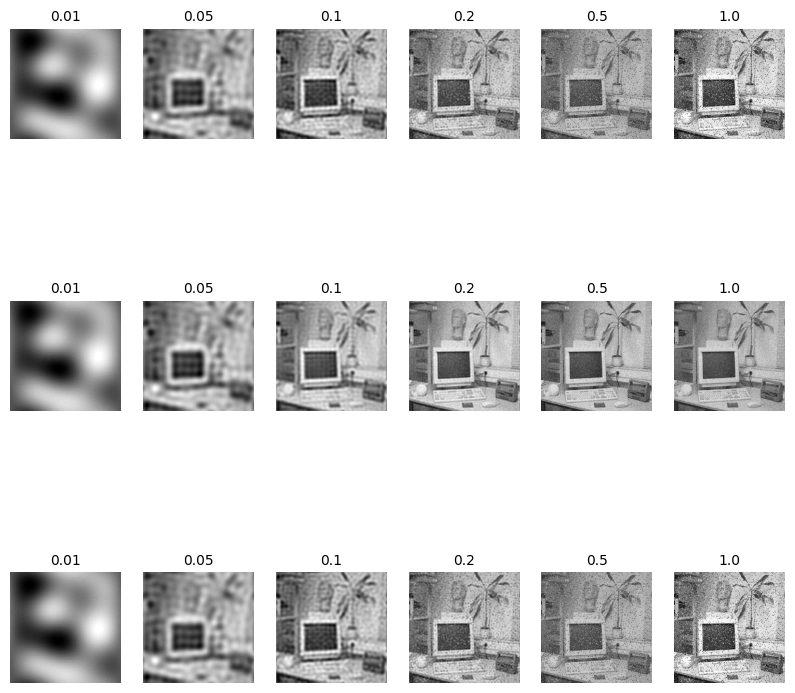

In [28]:
# Ideal lowpass filtering
f = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
imgs = [office, add, sap]

plt.figure(figsize=(10,10))
for i, img in enumerate(imgs):
    for j, t in enumerate(f):
        plt.subplot(3,6,6*i+j+1)	
        psf = ideal(img, t)
        showgrey(psf, False)
        plt.title(f'{t}')

Question 17: What are the positive and negative effects for each type of filter? Describe what you
observe and name the effects that you recognize. How do the results depend on the filter parameters?

From the above figures we can observe:
* Gaussian smoothing
  * image smoothing,
  * image blurring with higher variance, does not preserve edge information,
  * good in removing the gaussian white noise (with variance in [1,4]),
  * while not  good in removing the salt and pepper noise.
* Median filter, 
  * it preserves the edges with lower values of w.
  * keep high frequency
  * good in reducing sap, especially shown with w=2 and 4 (a value in between them could be optimal, e.g 3) .
  * image becomes illegible with w wider (image looks like paintings).
* Ideal low-pass filter
  * images distorted and blurred with cut-off frequency small (0.01),
  * with cut-off frequency high, the noise is kept,
  * keep low frequencies,
  * not smooth enough,
  * not good in reducing both the noises.


Question 18: What conclusions can you draw from comparing the results of the respective methods?

As stated above, the gaussian filter is good in removing the gaussian noise, by increasing the blurring of the images, but value of the variance too high will determine images totally blurred.

The median filter is a non linear filter in which each output sample is computed as the median value of the input samples under the window, and works better in removing the salt and pepper noise, while preserving the edges. 

The ideal low-pass filter cuts-off the higher frequency, but is not good in reducing the gaussian and the sap noises.

Question 19: What effects do you observe when subsampling the original image and the smoothed
variants? Illustrate both filters with the best results found for iteration i = 4.

By subsampling we are losing information, the images are still smoother than the original one. 

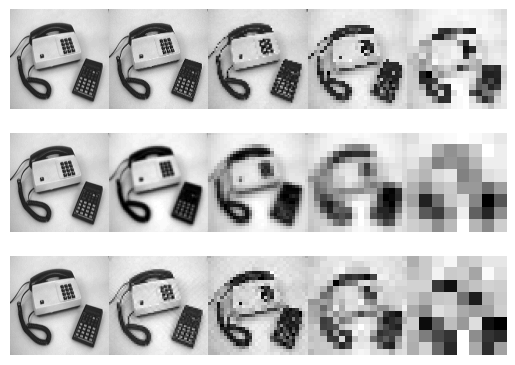

In [29]:
img = np.load("Images-npy/phonecalc256.npy")
smoothimg_gauss = img
smoothing_ideal = img
N = 5
f = plt.figure()
f.subplots_adjust(wspace=0, hspace=0)
for i in range(N):
    if i>0: # generate subsampled versions
        img = rawsubsample(img)
        smoothimg_gauss = gaussfft(img, 1) # <call_your_filter_here>(smoothimg, <params>)
        smoothimg_gauss = rawsubsample(smoothimg_gauss)
        smoothing_ideal = ideal(img, 0.4)
        smoothing_ideal = rawsubsample(smoothing_ideal)
    
    f.add_subplot(3, N, i + 1)
    showgrey(img, False)
    f.add_subplot(3, N, i + N + 1)
    showgrey(smoothimg_gauss, False)
    f.add_subplot(3, N, i + 2*N + 1)
    showgrey(smoothing_ideal, False)
plt.show()

Question 20: What conclusions can you draw regarding the effects of smoothing when combined
with subsampling? Hint: think in terms of frequencies and side effects

Subsampling decreases the information content, thus resulting in losing details. Details are found in the higher frequencies, and thus together with a filter will be even more discarded. As mentioned above, aliasing is a common error when
subsampling a signal. 